# 08 Deep Learning

## 8.2 Tensorflow and Keras

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [59]:
from tensorflow.keras.preprocessing.image import load_img

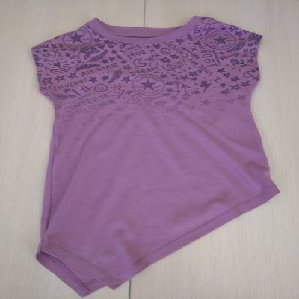

In [60]:
path='../datasets/clothing-dataset-small-master/test/t-shirt'
name='58aaf4e2-5a92-4c59-9321-6b37e65dcc46.jpg'
fullname=f"{path}/{name}"
load_img(fullname, target_size=(299, 299))

In [61]:
# convert the img into a numpy array
img=load_img(fullname, target_size=(299, 299))
x = np.array(img)
x.shape

(299, 299, 3)

# 8.3 Pre-trained convolutional neural networks

In [62]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [63]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [64]:
# use the above model to classify the image of a t-shirt
X = np.array([x])
X = preprocess_input(X)

In [65]:
pred = model.predict(X)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.01421050e-04, 3.68365618e-05, 1.02694787e-04, 7.55210349e-05,
        1.46981911e-04, 1.03094273e-04, 1.00375677e-04, 5.01543218e-05,
        5.06018987e-05, 4.59859366e-05, 1.08874607e-04, 9.74559880e-05,
        4.62188254e-05, 5.60575281e-05, 8.73709723e-05, 4.04341408e-05,
        1.01538251e-04, 5.15360480e-05, 6.72587703e-05, 6.41297011e-05,
        1.56466354e-04, 6.99265147e-05, 1.58760668e-04, 6.07632355e-05,
        7.93548679e-05, 9.47908411e-05, 1.41054596e-04, 1.07109408e-04,
        2.35271669e-04, 1.21417637e-04, 1.00437152e-04, 9.53098788e-05,
        9.78837998e-05, 1.68046012e-04, 1.54696580e-04, 1.88277467e-04,
        6.90928719e-05, 7.10366439e-05, 1.20143814e-04, 7.74106011e-05,
        6.15937533e-05, 1.45120386e-04, 6.04012748e-05, 8.06332828e-05,
        1.62687473e-04, 1.06745261e-04, 9.38570302e-05, 6.10165916e-05,
        1.62812896e-04, 1.62300523e-04, 1.16507254e-04, 9.50073227e-05,
        3.26462992e-04, 2.48455530e-04, 1.06616870e-04, 7.578705

In [66]:
# (1 means there is one image used, and 1000 means there are 1000 possible classes for the image to be in)
# each value in pred is the probability that the image belongs to that class
pred.shape

(1, 1000)

In [67]:
# a function that maps indices of the array to class names
# it looks at the predictions and tries to make them human readable
# even though imagenet is very comprehensive, when it comes to clothes it doesnt work for our classification task
decode_predictions(pred)

[[('n03595614', 'jersey', np.float32(0.61561286)),
  ('n04370456', 'sweatshirt', np.float32(0.085052736)),
  ('n04599235', 'wool', np.float32(0.043323442)),
  ('n04525038', 'velvet', np.float32(0.03461713)),
  ('n03710637', 'maillot', np.float32(0.022535702))]]

# 8.5 Transfer Learning


In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [69]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [70]:
train_ds = train_gen.flow_from_directory(
    '../datasets/clothing-dataset-small-master/train', 
    target_size=(150, 150), 
    batch_size=32)

Found 3068 images belonging to 10 classes.


In [71]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [72]:
X, y = next(train_ds)

In [73]:
X.shape # images in the batch

(32, 150, 150, 3)

In [74]:
y.shape # uses one-hot encoding for the label. The response vector

(32, 10)

In [75]:
# repeat for the validation and test data
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory('../datasets/clothing-dataset-small-master/validation/',
                                     target_size=(150, 150),
                                     batch_size=32,
                                     shuffle=False) # shuffle=False works here as for the validation we do not care about the order of the images. For training we do.

Found 341 images belonging to 10 classes.


In [76]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = val_gen.flow_from_directory('../datasets/clothing-dataset-small-master/test/',
                                     target_size=(150, 150),
                                     batch_size=32,
                                     shuffle=False) 

Found 372 images belonging to 10 classes.


In [77]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

# we do not want to train a new model. We want to just have the convolution layers so we specify base_model.trainable = False
# this freezes the convolutional layers
base_model.trainable = False

In [83]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 590ms/step - accuracy: 0.6776 - loss: 1.2025 - val_accuracy: 0.7654 - val_loss: 0.7991
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 604ms/step - accuracy: 0.8217 - loss: 0.5677 - val_accuracy: 0.7801 - val_loss: 0.8551
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 63s 660ms/step - accuracy: 0.8699 - loss: 0.3641 - val_accuracy: 0.8240 - val_loss: 0.8638
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 63s 657ms/step - accuracy: 0.9065 - loss: 0.2794 - val_accuracy: 0.7742 - val_loss: 1.0268
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 77s 799ms/step - accuracy: 0.9387 - loss: 0.1780 - val_accuracy: 0.7449 - val_loss: 1.0952
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 787ms/step - accuracy: 0.9547 - loss: 0.1319 - val_accuracy: 0.8006 - val_loss: 0.8936
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 72s 747ms/step - accuracy: 0.9547 - loss: 0.1358 - val_accuracy: 0.8152 - val_loss: 0.8821
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 73s 756ms/step - accuracy: 0.9850 - loss: 0.0584 - val_accu

In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

(32, 10)

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)